In [11]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data=pd.read_csv(r"C:\Users\easil\OneDrive\Desktop\EASILITECH B3\Data_sets\dataset_olympics.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [14]:
data.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [15]:
data.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [16]:
data.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [17]:
data.duplicated().sum()

383

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

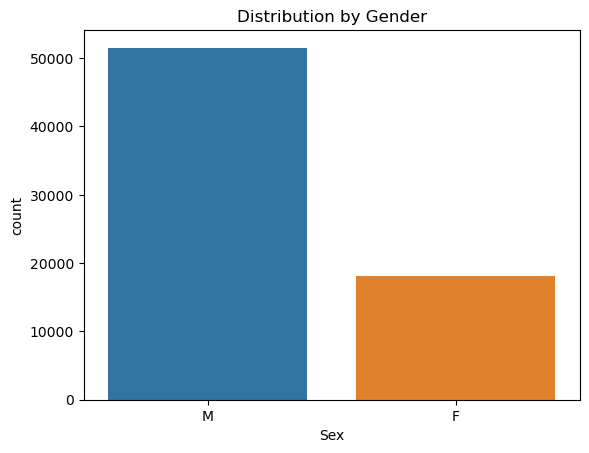

In [23]:
sns.countplot(data=data,x='Sex')
plt.title('Distribution by Gender')
plt.show()

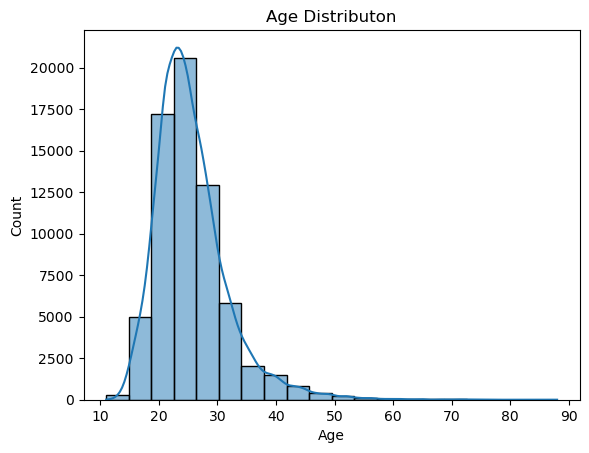

In [24]:
sns.histplot(data=data,x='Age',bins=20,kde=True)
plt.title("Age Distributon")
plt.show()

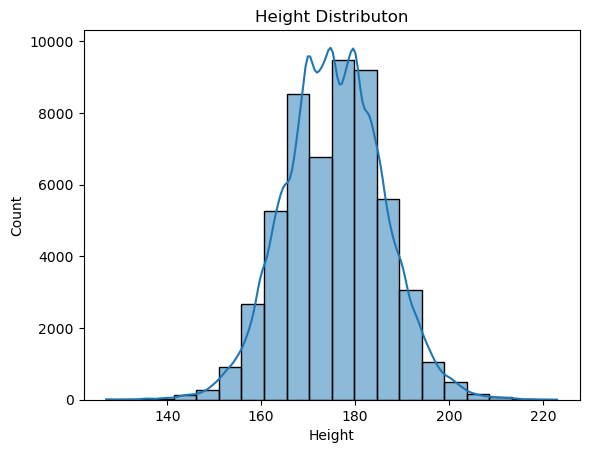

In [25]:
sns.histplot(data=data,x='Height',bins=20,kde=True)
plt.title("Height Distributon")
plt.show()

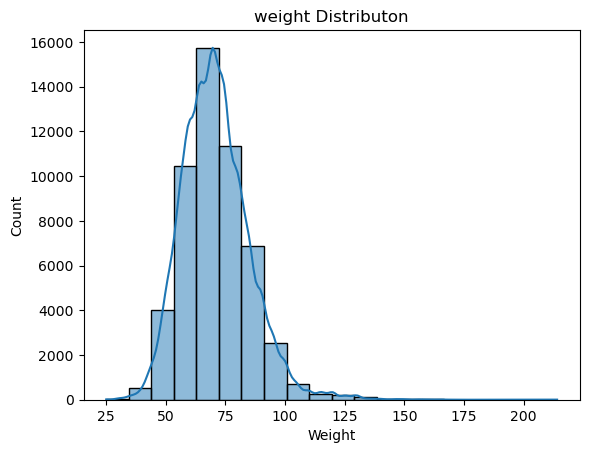

In [27]:
sns.histplot(data=data,x='Weight',bins=20,kde=True)
plt.title("weight Distributon")
plt.show()

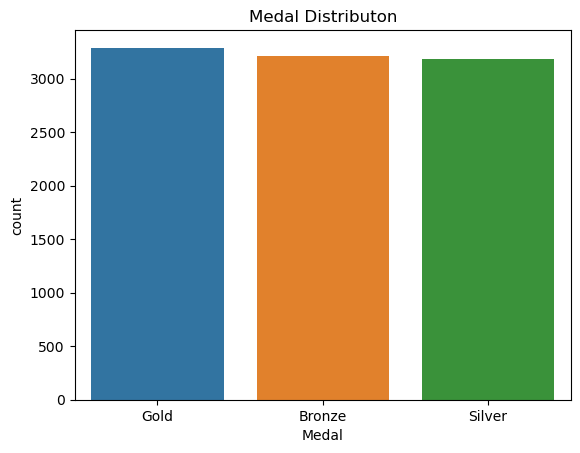

In [28]:
sns.countplot(data=data,x='Medal')
plt.title("Medal Distributon")
plt.show()

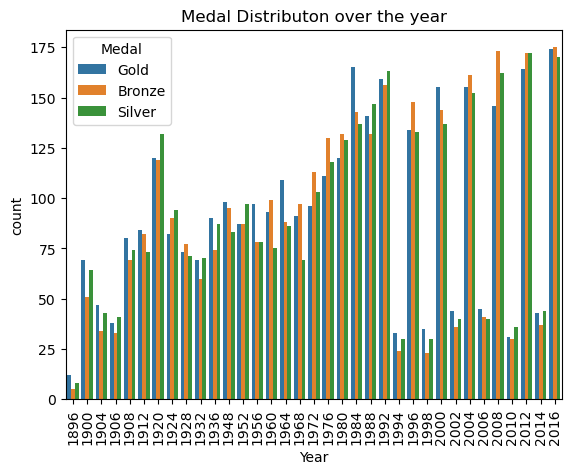

In [32]:
sns.countplot(data=data,x='Year',hue='Medal')
plt.title("Medal Distributon over the year")
plt.xticks(rotation=90)
plt.show()

In [34]:
year_avg_age= data.groupby('Year')['Age'].mean()
year_avg_age

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

In [39]:
sport_medain_height= data.groupby('Sport')['Height'].median()
sport_medain_height.min()

164.0

In [38]:
sport_medain_height[sport_medain_height==164.0]

Sport
Gymnastics    164.0
Name: Height, dtype: float64

In [40]:
Country_gender_count = data.groupby(['NOC','Sex'])['ID'].count()
Country_gender_count

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64

In [42]:
country_gold_medal = data[data['Medal']=='Gold'].groupby('NOC')['Medal'].count()
country_gold_medal.max()

747

In [44]:
country_gold_medal[country_gold_medal==747]

NOC
USA    747
Name: Medal, dtype: int64

In [46]:
sport_gender_avg_weight=data.groupby(['Sport','Sex'])['Weight'].mean()
sport_gender_avg_weight['Wrestling']['F']

58.16901408450704

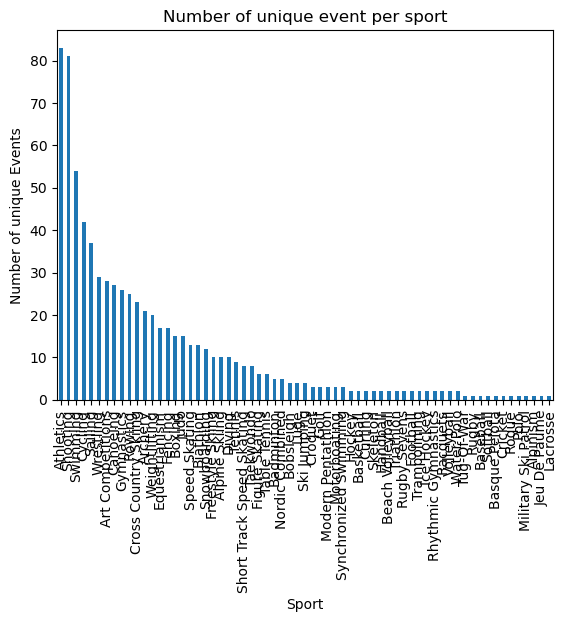

In [51]:
sport_event_count = data.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
sport_event_count.plot(kind='bar')
plt.title('Number of unique event per sport')
plt.xlabel('Sport')
plt.ylabel('Number of unique Events')
plt.xticks(rotation=90)
plt.show()

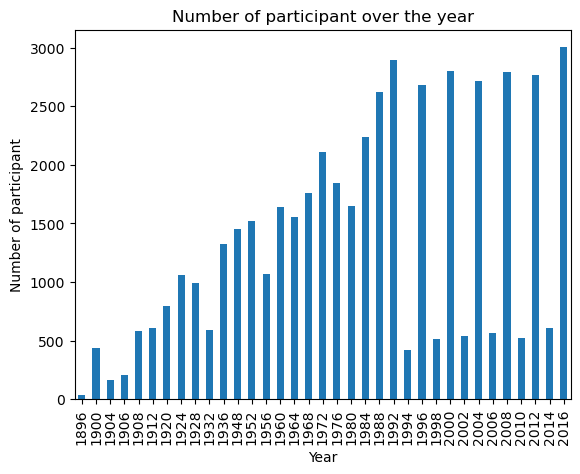

In [55]:
year_participant_count=data.groupby('Year')['ID'].nunique()
year_participant_count.plot(kind='bar')
plt.title('Number of participant over the year')
plt.xlabel('Year')
plt.ylabel('Number of participant')
plt.show()

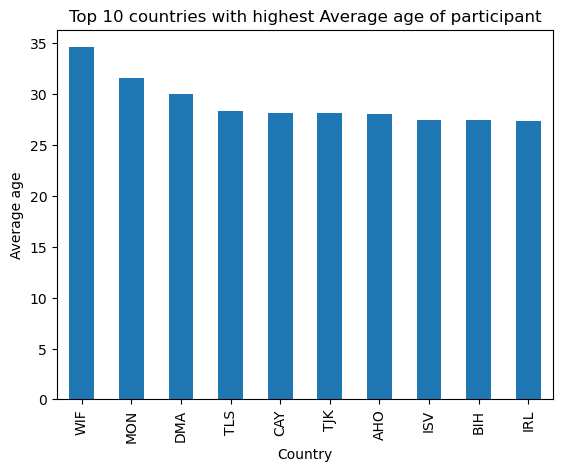

In [60]:
country_avg_age=data.groupby('NOC')['Age'].mean().sort_values(ascending=False)
country_avg_age.head(10).plot(kind='bar')
plt.title('Top 10 countries with highest Average age of participant')
plt.xlabel('Country')
plt.ylabel('Average age')
plt.xticks(rotation=90)
plt.show()

In [64]:
country_avg_age=data.groupby('NOC')['Age'].mean().sort_values(ascending=False).reset_index().head(10)
country_avg_age

,NOC,Age
0,WIF,34.600000
1,MON,31.611111
2,DMA,30.000000
3,TLS,28.333333
4,CAY,28.181818
5,TJK,28.161290
6,AHO,28.090909
7,ISV,27.462687
8,BIH,27.454545
9,IRL,27.390935


<AxesSubplot:xlabel='NOC', ylabel='Age'>

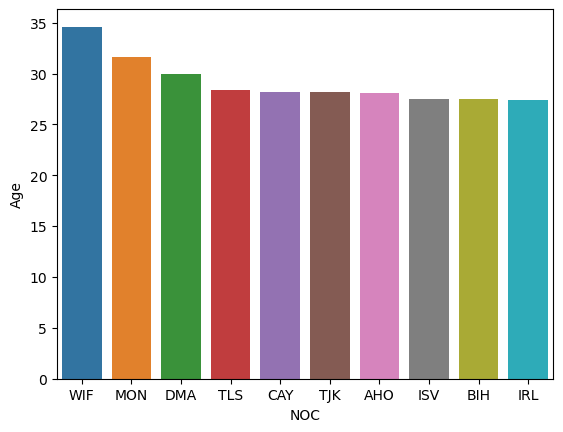

In [65]:
sns.barplot(data=country_avg_age,x='NOC',y='Age')

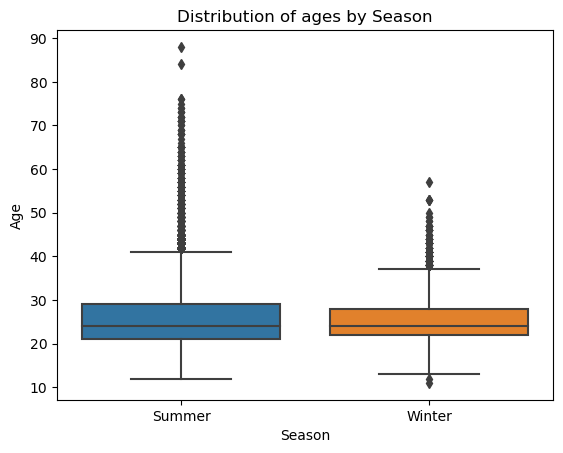

In [66]:
sns.boxplot(data=data,x='Season',y='Age')
plt.title('Distribution of ages by Season')
plt.xlabel('Season')
plt.ylabel('Age')
plt.show()

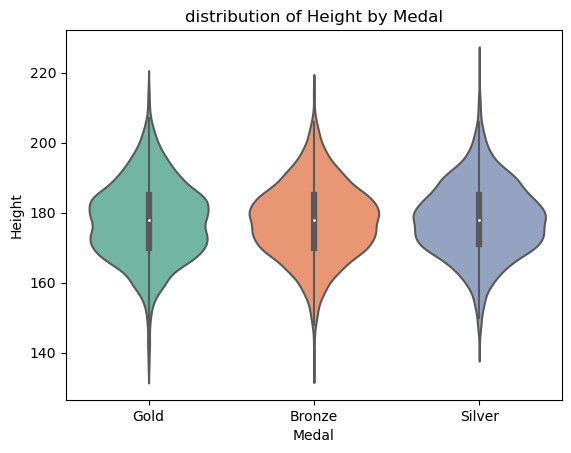

In [67]:
sns.violinplot(data=data,x='Medal',y='Height',palette='Set2')
plt.title('distribution of Height by Medal')
plt.xlabel('Medal')
plt.ylabel('Height')
plt.show()

In [69]:
most_medals_country= data["NOC"].value_counts().idxmax()
most_medals_country

'USA'

In [70]:
tallest_athlete=data[data['Height']==data['Height'].max()]
tallest_athlete
print(tallest_athlete[['ID','Name','Height','Sport']])

          ID                  Name  Height       Sport
32376  16639  Tommy Loren Burleson   223.0  Basketball


In [72]:
heaviest_athlete=data[data['Weight']==data['Weight'].max()]
heaviest_athlete
print(heaviest_athlete[['ID','Name','Weight','Sport']])

          ID               Name  Weight Sport
23155  12177  Ricardo Blas, Jr.   214.0  Judo
23156  12177  Ricardo Blas, Jr.   214.0  Judo


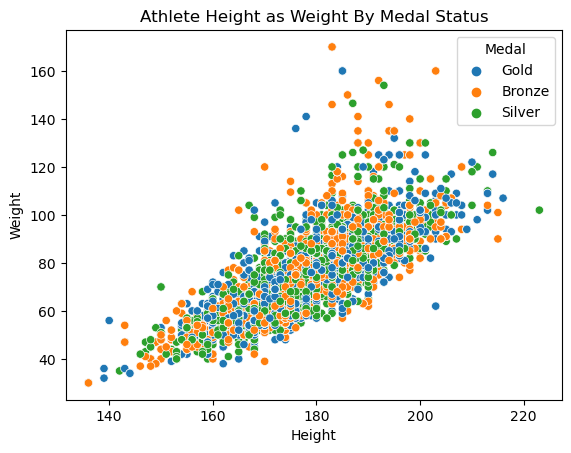

In [73]:
sns.scatterplot(data=data,x='Height',y='Weight',hue='Medal')
plt.title('Athlete Height as Weight By Medal Status')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Medal')
plt.show()

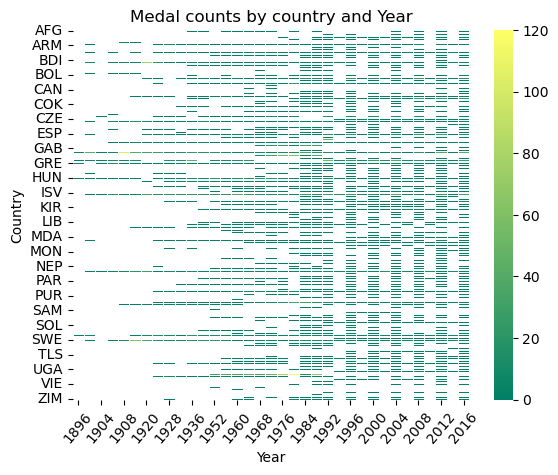

In [76]:
medal_by_country_year= data.pivot_table(index='NOC',columns='Year',values='Medal',aggfunc='count')
sns.heatmap(medal_by_country_year,cmap='summer',linewidth=0.5)
plt.title('Medal counts by country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=50)
plt.show()